## Problem Statement

- For Text Mining assignment.
  
    1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import re

import warnings
warnings.filterwarnings('ignore')

- Dataset:- Elon_musk.csv

In [2]:
#read dataset
data = pd.read_csv('Elon_musk.csv', encoding='latin1', index_col=0)
data

Text
1                                @kunalb11 Im an alien
2     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
3                   @joerogan @Spotify Great interview!
4                       @gtera27 Doge is underestimated
5     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1995  @flcnhvy True, it sounds so surreal, but the n...
1996  @PPathole Make sure to read ur terms &amp; con...
1997                @TeslaGong @PPathole Samwise Gamgee
1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1999                          Progress update August 28

[1999 rows x 1 columns]

In [3]:
# Removes patterns in the input text.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [4]:
# Remove twitter handles.

data['Clean_text'] = np.vectorize(remove_pattern)(data['Text'], "@[\w]*")
data

Text  \
1                                @kunalb11 Im an alien   
2     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
3                   @joerogan @Spotify Great interview!   
4                       @gtera27 Doge is underestimated   
5     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1995  @flcnhvy True, it sounds so surreal, but the n...   
1996  @PPathole Make sure to read ur terms &amp; con...   
1997                @TeslaGong @PPathole Samwise Gamgee   
1998  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1999                          Progress update August 28   

                                             Clean_text  
1                                          Im an alien  
2      Ray tracing on Cyberpunk with HDR is next-lev...  
3                                      Great interview!  
4                                Doge is underestimated  
5      Congratulations Tesla China for amazing execu...  
...                                                 ...  
1995   True, it sounds so surreal, but the negative ...  
1996   Make sure to read ur terms &amp; conditions b...  
1997                                     Samwise Gamgee  
1998   Altho Dumb and Dumber is <U+0001F525><U+0001F...  
1999                          Progress update August 28  

[1999 rows x 2 columns]

In [5]:
# Remove special characters, numbers and punctuations.

data['Clean_text'] = data['Clean_text'].str.replace("[^a-zA-Z]", " ")
data

Text  \
1                                @kunalb11 Im an alien   
2     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
3                   @joerogan @Spotify Great interview!   
4                       @gtera27 Doge is underestimated   
5     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1995  @flcnhvy True, it sounds so surreal, but the n...   
1996  @PPathole Make sure to read ur terms &amp; con...   
1997                @TeslaGong @PPathole Samwise Gamgee   
1998  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1999                          Progress update August 28   

                                             Clean_text  
1                                          I m an alien  
2      Ray tracing on Cyberpunk with HDR is next lev...  
3                                      Great interview   
4                                Doge is underestimated  
5      Congratulations Tesla China for amazing execu...  
...                                                 ...  
1995   True  it sounds so surreal  but the negative ...  
1996   Make sure to read ur terms  amp  conditions b...  
1997                                     Samwise Gamgee  
1998   Altho Dumb and Dumber is  U     F     U     F...  
1999                          Progress update August     

[1999 rows x 2 columns]

In [6]:
# Remove links.

data['Clean_text'] = data['Clean_text'].str.replace('http[^\s][^s]+', " ")
data.head(20)

Text  \
1                              @kunalb11 Im an alien   
2   @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
3                 @joerogan @Spotify Great interview!   
4                     @gtera27 Doge is underestimated   
5   @teslacn Congratulations Tesla China for amazi...   
6   Happy New Year of the Ox! https://t.co/9WFKMYu2oj   
7   Frodo was the underdoge,\nAll thought he would...   
8      @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)   
9   @flcnhvy @anonyx10 Indeed! Tweets definitely d...   
10   The most entertaining outcome is the most likely   
11                       @GiveDirectly Just sent some   
12         Just agree to do Clubhouse with @kanyewest   
13                            https://t.co/3rWE9uHSTS   
14     @geoffkeighley @UnrealEngine Its getting real   
15  Bought some Dogecoin for lil X, so he can be a...   
16  @JoshManMode He definitely has issues, but the...   
17                   @freewalletorg Thanks for fixing   
18            @freewalletorg Please unlock my account   
19               @AstroJordy <U+0001F923><U+0001F923>   
20    This is true power haha https://t.co/Fc9uhQSd7O   

                                           Clean_text  
1                                        I m an alien  
2    Ray tracing on Cyberpunk with HDR is next lev...  
3                                    Great interview   
4                              Doge is underestimated  
5    Congratulations Tesla China for amazing execu...  
6                         Happy New Year of the Ox     
7   Frodo was the underdoge  All thought he would ...  
8                                      Haha thanks     
9     Indeed  Tweets definitely do not represent r...  
10   The most entertaining outcome is the most likely  
11                                     Just sent some  
12                   Just agree to do Clubhouse with   
13                                                     
14                                  It s getting real  
15  Bought some Dogecoin for lil X  so he can be a...  
16   He definitely has issues  but the sentencing ...  
17                                  Thanks for fixing  
18                           Please unlock my account  
19                            U     F     U     F      
20                          This is true power haha

In [7]:
#Text Normalization.

Lower = []

for i in data['Clean_text']:
    x = i.lower()
    Lower.append(x)

In [8]:
data['Clean_text'] = Lower
data

Text  \
1                                @kunalb11 Im an alien   
2     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
3                   @joerogan @Spotify Great interview!   
4                       @gtera27 Doge is underestimated   
5     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1995  @flcnhvy True, it sounds so surreal, but the n...   
1996  @PPathole Make sure to read ur terms &amp; con...   
1997                @TeslaGong @PPathole Samwise Gamgee   
1998  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1999                          Progress update August 28   

                                             Clean_text  
1                                          i m an alien  
2      ray tracing on cyberpunk with hdr is next lev...  
3                                      great interview   
4                                doge is underestimated  
5      congratulations tesla china for amazing execu...  
...                                                 ...  
1995   true  it sounds so surreal  but the negative ...  
1996   make sure to read ur terms  amp  conditions b...  
1997                                     samwise gamgee  
1998   altho dumb and dumber is  u     f     u     f...  
1999                          progress update august     

[1999 rows x 2 columns]

- Stopwords

In [9]:
text = open('stop.txt', 'r+')
text

<_io.TextIOWrapper name='stop.txt' mode='r+' encoding='cp1252'>

In [10]:
sw = []

for i in text:
    sw.append(str(i))

In [11]:
sw

['a\n',
 "a's\n",
 'able\n',
 'about\n',
 'above\n',
 'according\n',
 'accordingly\n',
 'across\n',
 'actually\n',
 'after\n',
 'afterwards\n',
 'again\n',
 'against\n',
 "ain't\n",
 'all\n',
 'allow\n',
 'allows\n',
 'almost\n',
 'alone\n',
 'along\n',
 'already\n',
 'also\n',
 'although\n',
 'always\n',
 'am\n',
 'among\n',
 'amongst\n',
 'an\n',
 'and\n',
 'another\n',
 'any\n',
 'anybody\n',
 'anyhow\n',
 'anyone\n',
 'anything\n',
 'anyway\n',
 'anyways\n',
 'anywhere\n',
 'apart\n',
 'appear\n',
 'appreciate\n',
 'appropriate\n',
 'are\n',
 "aren't\n",
 'around\n',
 'as\n',
 'aside\n',
 'ask\n',
 'asking\n',
 'associated\n',
 'at\n',
 'available\n',
 'away\n',
 'awfully\n',
 'b\n',
 'be\n',
 'became\n',
 'because\n',
 'become\n',
 'becomes\n',
 'becoming\n',
 'been\n',
 'before\n',
 'beforehand\n',
 'behind\n',
 'being\n',
 'believe\n',
 'below\n',
 'beside\n',
 'besides\n',
 'best\n',
 'better\n',
 'between\n',
 'beyond\n',
 'both\n',
 'brief\n',
 'but\n',
 'by\n',
 'c\n',
 "c'm

In [12]:
stop_words = np.vectorize(remove_pattern)(sw, "[\n]*")
stop_words

array(['a', "a's", 'able', 'about', 'above', 'according', 'accordingly',
       'across', 'actually', 'after', 'afterwards', 'again', 'against',
       "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along',
       'already', 'also', 'although', 'always', 'am', 'among', 'amongst',
       'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone',
       'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear',
       'appreciate', 'appropriate', 'are', "aren't", 'around', 'as',
       'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away',
       'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes',
       'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
       'believe', 'below', 'beside', 'besides', 'best', 'better',
       'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon",
       "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes',
       'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come',


In [13]:
#Word frequency

freq = pd.Series(' '.join(data['Clean_text']).split()).value_counts()[:20] # for top 20
freq

the     487
to      400
a       390
is      356
u       320
of      316
f       253
in      221
amp     219
s       208
for     194
it      193
we      172
will    165
be      157
that    149
this    140
i       138
on      129
rt      127
dtype: int64

In [14]:
#Removing stopwords.

data['Clean_text'] = data['Clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
data

Text  \
1                                @kunalb11 Im an alien   
2     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
3                   @joerogan @Spotify Great interview!   
4                       @gtera27 Doge is underestimated   
5     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1995  @flcnhvy True, it sounds so surreal, but the n...   
1996  @PPathole Make sure to read ur terms &amp; con...   
1997                @TeslaGong @PPathole Samwise Gamgee   
1998  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1999                          Progress update August 28   

                                             Clean_text  
1                                                 alien  
2                       ray tracing cyberpunk hdr level  
3                                       great interview  
4                                   doge underestimated  
5     congratulations tesla china amazing execution ...  
...                                                 ...  
1995  true sounds surreal negative propaganda amp ea...  
1996  make read ur terms amp conditions clicking accept  
1997                                     samwise gamgee  
1998                                  altho dumb dumber  
1999                             progress update august  

[1999 rows x 2 columns]

In [15]:
#word frequency after removal of stopwords.

freq_Sw = pd.Series(' '.join(data['Clean_text']).split()).value_counts()[:20] # for top 20
freq_Sw

amp           219
rt            127
tesla          97
great          76
haha           55
good           51
launch         49
yeah           41
dragon         39
sn             38
spacex         37
true           35
high           34
make           33
people         32
starship       31
year           31
production     30
falcon         29
crew           27
dtype: int64

In [16]:
# Remove short wards.

data['Clean_text'] = data['Clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [17]:
#word frequency after removal of short words.

freq_Sw = pd.Series(' '.join(data['Clean_text']).split()).value_counts()[:20] # for top 20
freq_Sw

tesla         97
great         76
haha          55
good          51
launch        49
yeah          41
dragon        39
spacex        37
true          35
high          34
make          33
people        32
year          31
starship      31
production    30
falcon        29
crew          27
model         26
coming        25
starlink      25
dtype: int64

In [18]:
# Lemmatization.

lemma = WordNetLemmatizer()

data['Clean_text'] = data['Clean_text'].apply(lambda x: " ".join([lemma.lemmatize(w) for w in x.split()]))
data

Text  \
1                                @kunalb11 Im an alien   
2     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
3                   @joerogan @Spotify Great interview!   
4                       @gtera27 Doge is underestimated   
5     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1995  @flcnhvy True, it sounds so surreal, but the n...   
1996  @PPathole Make sure to read ur terms &amp; con...   
1997                @TeslaGong @PPathole Samwise Gamgee   
1998  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1999                          Progress update August 28   

                                             Clean_text  
1                                                 alien  
2                               tracing cyberpunk level  
3                                       great interview  
4                                   doge underestimated  
5     congratulation tesla china amazing execution year  
...                                                 ...  
1995  true sound surreal negative propaganda easy fi...  
1996           make read term condition clicking accept  
1997                                     samwise gamgee  
1998                                  altho dumb dumber  
1999                             progress update august  

[1999 rows x 2 columns]

In [19]:
#Blank tweets after preprocessing.

data[data['Clean_text'] == '']

Text Clean_text
11                         @GiveDirectly Just sent some           
13                              https://t.co/3rWE9uHSTS           
19                 @AstroJordy <U+0001F923><U+0001F923>           
24                                     @ajtourville Yes           
31    @CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer ...           
...                                                 ...        ...
1982                    @Techgnostik @EvaFoxU @Tesla Ok           
1983             @scr00chy @EvaFoxU @Tesla <U+0001F440>           
1989                                      @redmercy Yes           
1990      @buzzindelhi Sorry, should hopefully be soon!           
1994   @vistacruiser7 @flcnhvy Theres some of that too           

[327 rows x 2 columns]

In [20]:
#Replace blank tweets with nan.

data[data['Clean_text'] == ''] = data[data['Clean_text'] == ''].replace('', np.nan)
data.head(15)

Text  \
1                              @kunalb11 Im an alien   
2   @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
3                 @joerogan @Spotify Great interview!   
4                     @gtera27 Doge is underestimated   
5   @teslacn Congratulations Tesla China for amazi...   
6   Happy New Year of the Ox! https://t.co/9WFKMYu2oj   
7   Frodo was the underdoge,\nAll thought he would...   
8      @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)   
9   @flcnhvy @anonyx10 Indeed! Tweets definitely d...   
10   The most entertaining outcome is the most likely   
11                       @GiveDirectly Just sent some   
12         Just agree to do Clubhouse with @kanyewest   
13                            https://t.co/3rWE9uHSTS   
14     @geoffkeighley @UnrealEngine Its getting real   
15  Bought some Dogecoin for lil X, so he can be a...   

                                           Clean_text  
1                                               alien  
2                             tracing cyberpunk level  
3                                     great interview  
4                                 doge underestimated  
5   congratulation tesla china amazing execution year  
6                                          happy year  
7                        frodo underdoge thought fail  
8                                                haha  
9          tweet represent real world time allocation  
10                               entertaining outcome  
11                                                NaN  
12                                    agree clubhouse  
13                                                NaN  
14                                               real  
15                     bought dogecoin toddler hodler

In [21]:
#Droping null tweets.

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1667  @flcnhvy True, it sounds so surreal, but the n...   
1668  @PPathole Make sure to read ur terms &amp; con...   
1669                @TeslaGong @PPathole Samwise Gamgee   
1670  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1671                          Progress update August 28   

                                             Clean_text  
0                                                 alien  
1                               tracing cyberpunk level  
2                                       great interview  
3                                   doge underestimated  
4     congratulation tesla china amazing execution year  
...                                                 ...  
1667  true sound surreal negative propaganda easy fi...  
1668           make read term condition clicking accept  
1669                                     samwise gamgee  
1670                                  altho dumb dumber  
1671                             progress update august  

[1672 rows x 2 columns]

###### Positive words

In [22]:
positive = open('positive-words.txt', 'r+')
positive

<_io.TextIOWrapper name='positive-words.txt' mode='r+' encoding='cp1252'>

In [23]:
positive_words = []

for i in positive:
    positive_words.append(str(i))

In [24]:
positive_words

['a+\n',
 'abound\n',
 'abounds\n',
 'abundance\n',
 'abundant\n',
 'accessable\n',
 'accessible\n',
 'acclaim\n',
 'acclaimed\n',
 'acclamation\n',
 'accolade\n',
 'accolades\n',
 'accommodative\n',
 'accomodative\n',
 'accomplish\n',
 'accomplished\n',
 'accomplishment\n',
 'accomplishments\n',
 'accurate\n',
 'accurately\n',
 'achievable\n',
 'achievement\n',
 'achievements\n',
 'achievible\n',
 'acumen\n',
 'adaptable\n',
 'adaptive\n',
 'adequate\n',
 'adjustable\n',
 'admirable\n',
 'admirably\n',
 'admiration\n',
 'admire\n',
 'admirer\n',
 'admiring\n',
 'admiringly\n',
 'adorable\n',
 'adore\n',
 'adored\n',
 'adorer\n',
 'adoring\n',
 'adoringly\n',
 'adroit\n',
 'adroitly\n',
 'adulate\n',
 'adulation\n',
 'adulatory\n',
 'advanced\n',
 'advantage\n',
 'advantageous\n',
 'advantageously\n',
 'advantages\n',
 'adventuresome\n',
 'adventurous\n',
 'advocate\n',
 'advocated\n',
 'advocates\n',
 'affability\n',
 'affable\n',
 'affably\n',
 'affectation\n',
 'affection\n',
 'affe

In [25]:
positive_words = np.vectorize(remove_pattern)(positive_words, "[\n]*")
positive_words

array(['a+', 'abound', 'abounds', ..., 'zenith', 'zest', 'zippy'],
      dtype='<U20')

###### Negative words

In [26]:
negative = open('negative-words.txt', 'r+')
negative

<_io.TextIOWrapper name='negative-words.txt' mode='r+' encoding='cp1252'>

In [27]:
negative_words = []

for i in negative:
    negative_words.append(str(i))

In [28]:
negative_words

['2-faced\n',
 '2-faces\n',
 'abnormal\n',
 'abolish\n',
 'abominable\n',
 'abominably\n',
 'abominate\n',
 'abomination\n',
 'abort\n',
 'aborted\n',
 'aborts\n',
 'abrade\n',
 'abrasive\n',
 'abrupt\n',
 'abruptly\n',
 'abscond\n',
 'absence\n',
 'absent-minded\n',
 'absentee\n',
 'absurd\n',
 'absurdity\n',
 'absurdly\n',
 'absurdness\n',
 'abuse\n',
 'abused\n',
 'abuses\n',
 'abusive\n',
 'abysmal\n',
 'abysmally\n',
 'abyss\n',
 'accidental\n',
 'accost\n',
 'accursed\n',
 'accusation\n',
 'accusations\n',
 'accuse\n',
 'accuses\n',
 'accusing\n',
 'accusingly\n',
 'acerbate\n',
 'acerbic\n',
 'acerbically\n',
 'ache\n',
 'ached\n',
 'aches\n',
 'achey\n',
 'aching\n',
 'acrid\n',
 'acridly\n',
 'acridness\n',
 'acrimonious\n',
 'acrimoniously\n',
 'acrimony\n',
 'adamant\n',
 'adamantly\n',
 'addict\n',
 'addicted\n',
 'addicting\n',
 'addicts\n',
 'admonish\n',
 'admonisher\n',
 'admonishingly\n',
 'admonishment\n',
 'admonition\n',
 'adulterate\n',
 'adulterated\n',
 'adultera

In [29]:
negative_words = np.vectorize(remove_pattern)(negative_words, "[\n]*")
negative_words

array(['2-faced', '2-faces', 'abnormal', ..., 'zealous', 'zealously',
       'zombie'], dtype='<U24')

In [30]:
#Split words and Calculate length of words.

data['Split'] = data['Clean_text'].apply(lambda x: x.split())
data['Length'] = data['Split'].apply(lambda x: len(x))
data

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1667  @flcnhvy True, it sounds so surreal, but the n...   
1668  @PPathole Make sure to read ur terms &amp; con...   
1669                @TeslaGong @PPathole Samwise Gamgee   
1670  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1671                          Progress update August 28   

                                             Clean_text  \
0                                                 alien   
1                               tracing cyberpunk level   
2                                       great interview   
3                                   doge underestimated   
4     congratulation tesla china amazing execution year   
...                                                 ...   
1667  true sound surreal negative propaganda easy fi...   
1668           make read term condition clicking accept   
1669                                     samwise gamgee   
1670                                  altho dumb dumber   
1671                             progress update august   

                                                  Split  Length  
0                                               [alien]       1  
1                           [tracing, cyberpunk, level]       3  
2                                    [great, interview]       2  
3                                [doge, underestimated]       2  
4     [congratulation, tesla, china, amazing, execut...       6  
...                                                 ...     ...  
1667  [true, sound, surreal, negative, propaganda, e...       8  
1668    [make, read, term, condition, clicking, accept]       6  
1669                                  [samwise, gamgee]       2  
1670                              [altho, dumb, dumber]       3  
1671                         [progress, update, august]       3  

[1672 rows x 4 columns]

In [31]:
#Positive word count in tweets.

pos_num = data['Split'].map(lambda x: len([i for i in x if i in positive_words]))
data['pos_count'] = pos_num

#Negative word count in tweets.

neg_num = data['Split'].map(lambda x: len([i for i in x if i in negative_words]))
data['neg_count'] = neg_num

#Praportion of positive and negative words present in tweets.

data['sentiment'] = round((data['pos_count'] - data['neg_count']) / data['Length'], 2)

#Final data.

data

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1667  @flcnhvy True, it sounds so surreal, but the n...   
1668  @PPathole Make sure to read ur terms &amp; con...   
1669                @TeslaGong @PPathole Samwise Gamgee   
1670  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1671                          Progress update August 28   

                                             Clean_text  \
0                                                 alien   
1                               tracing cyberpunk level   
2                                       great interview   
3                                   doge underestimated   
4     congratulation tesla china amazing execution year   
...                                                 ...   
1667  true sound surreal negative propaganda easy fi...   
1668           make read term condition clicking accept   
1669                                     samwise gamgee   
1670                                  altho dumb dumber   
1671                             progress update august   

                                                  Split  Length  pos_count  \
0                                               [alien]       1          0   
1                           [tracing, cyberpunk, level]       3          0   
2                                    [great, interview]       2          1   
3                                [doge, underestimated]       2          0   
4     [congratulation, tesla, china, amazing, execut...       6          2   
...                                                 ...     ...        ...   
1667  [true, sound, surreal, negative, propaganda, e...       8          2   
1668    [make, read, term, condition, clicking, accept]       6          0   
1669                                  [samwise, gamgee]       2          0   
1670                              [altho, dumb, dumber]       3          0   
1671                         [progress, update, august]       3          1   

      neg_count  sentiment  
0             0       0.00  
1             0       0.00  
2             0       0.50  
3             0       0.00  
4             0       0.33  
...         ...        ...  
1667          2       0.00  
1668          0       0.00  
1669          0       0.00  
1670          1      -0.33  
1671          0       0.33  

[1672 rows x 7 columns]

In [32]:
#Classification of tweets based on sentiment score.

Class = []

for i in data['sentiment']:
    if i > 0:
        Class.append('Positive')
    elif i < 0:
        Class.append('Negative')
    else:
        Class.append('Neutral')

In [33]:
data['Class'] = Class
data

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1667  @flcnhvy True, it sounds so surreal, but the n...   
1668  @PPathole Make sure to read ur terms &amp; con...   
1669                @TeslaGong @PPathole Samwise Gamgee   
1670  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1671                          Progress update August 28   

                                             Clean_text  \
0                                                 alien   
1                               tracing cyberpunk level   
2                                       great interview   
3                                   doge underestimated   
4     congratulation tesla china amazing execution year   
...                                                 ...   
1667  true sound surreal negative propaganda easy fi...   
1668           make read term condition clicking accept   
1669                                     samwise gamgee   
1670                                  altho dumb dumber   
1671                             progress update august   

                                                  Split  Length  pos_count  \
0                                               [alien]       1          0   
1                           [tracing, cyberpunk, level]       3          0   
2                                    [great, interview]       2          1   
3                                [doge, underestimated]       2          0   
4     [congratulation, tesla, china, amazing, execut...       6          2   
...                                                 ...     ...        ...   
1667  [true, sound, surreal, negative, propaganda, e...       8          2   
1668    [make, read, term, condition, clicking, accept]       6          0   
1669                                  [samwise, gamgee]       2          0   
1670                              [altho, dumb, dumber]       3          0   
1671                         [progress, update, august]       3          1   

      neg_count  sentiment     Class  
0             0       0.00   Neutral  
1             0       0.00   Neutral  
2             0       0.50  Positive  
3             0       0.00   Neutral  
4             0       0.33  Positive  
...         ...        ...       ...  
1667          2       0.00   Neutral  
1668          0       0.00   Neutral  
1669          0       0.00   Neutral  
1670          1      -0.33  Negative  
1671          0       0.33  Positive  

[1672 rows x 8 columns]

In [34]:
# Positive tweets.

data[data['Class'] == 'Positive']

Text  \
2                   @joerogan @Spotify Great interview!   
4     @teslacn Congratulations Tesla China for amazi...   
5     Happy New Year of the Ox! https://t.co/9WFKMYu2oj   
9      The most entertaining outcome is the most likely   
26    XPrize team will manage the $100M carbon captu...   
...                                                 ...   
1648  @nichegamer I didnt mind DA2. DA1 was awesome...   
1652  @Ali_Afshari In general, we need to improve ho...   
1658  @mjkapkan @EvaFoxU @Tesla Probably a good one ...   
1663  @PPathole @IheartTesla For sure. This is both ...   
1671                          Progress update August 28   

                                             Clean_text  \
2                                       great interview   
4     congratulation tesla china amazing execution year   
5                                            happy year   
9                                  entertaining outcome   
26              xprize team manage carbon capture prize   
...                                                 ...   
1648  didn mind awesome mass effect talking sequel a...   
1652                      general improve podcasts play   
1658                       good design engineer germany   
1663                    great terrifying sensed thought   
1671                             progress update august   

                                                  Split  Length  pos_count  \
2                                    [great, interview]       2          1   
4     [congratulation, tesla, china, amazing, execut...       6          2   
5                                         [happy, year]       2          1   
9                               [entertaining, outcome]       2          1   
26       [xprize, team, manage, carbon, capture, prize]       6          1   
...                                                 ...     ...        ...   
1648  [didn, mind, awesome, mass, effect, talking, s...       8          2   
1652                 [general, improve, podcasts, play]       4          1   
1658                  [good, design, engineer, germany]       4          1   
1663               [great, terrifying, sensed, thought]       4          1   
1671                         [progress, update, august]       3          1   

      neg_count  sentiment     Class  
2             0       0.50  Positive  
4             0       0.33  Positive  
5             0       0.50  Positive  
9             0       0.50  Positive  
26            0       0.17  Positive  
...         ...        ...       ...  
1648          0       0.25  Positive  
1652          0       0.25  Positive  
1658          0       0.25  Positive  
1663          0       0.25  Positive  
1671          0       0.33  Positive  

[454 rows x 8 columns]

In [35]:
# Negative tweets.

data[data['Class'] == 'Negative']

Text  \
6     Frodo was the underdoge,\nAll thought he would...   
13    @JoshManMode He definitely has issues, but the...   
18                        @freewalletorg Your app sucks   
21    @RationalEtienne @Adamklotz_ Starlink is a sta...   
22    @RationalEtienne @Adamklotz_ SpaceX needs to p...   
...                                                 ...   
1645  @jgrano305 @TeslaratiTeam @Teslarati No, as ra...   
1647       @PPathole That is the near-term danger of AI   
1650     @OprahSide Maybe he should design flag of Mars   
1655  @RationalEtienne @flcnhvy @PPathole @IheartTes...   
1670  @PPathole Altho Dumb and Dumber is <U+0001F525...   

                                             Clean_text  \
6                          frodo underdoge thought fail   
13                                issue sentencing high   
18                                                 suck   
21    starlink staggeringly difficult technical econ...   
22        spacex pas deep chasm negative cash flow year   
...                                                 ...   
1645                            range unacceptably mile   
1647                                        term danger   
1650                                    design flag mar   
1655                             death loss information   
1670                                  altho dumb dumber   

                                                  Split  Length  pos_count  \
6                     [frodo, underdoge, thought, fail]       4          0   
13                            [issue, sentencing, high]       3          0   
18                                               [suck]       1          0   
21    [starlink, staggeringly, difficult, technical,...       7          0   
22    [spacex, pas, deep, chasm, negative, cash, flo...       8          0   
...                                                 ...     ...        ...   
1645                        [range, unacceptably, mile]       3          0   
1647                                     [term, danger]       2          0   
1650                                [design, flag, mar]       3          0   
1655                         [death, loss, information]       3          0   
1670                              [altho, dumb, dumber]       3          0   

      neg_count  sentiment     Class  
6             1      -0.25  Negative  
13            1      -0.33  Negative  
18            1      -1.00  Negative  
21            1      -0.14  Negative  
22            1      -0.12  Negative  
...         ...        ...       ...  
1645          1      -0.33  Negative  
1647          1      -0.50  Negative  
1650          1      -0.33  Negative  
1655          2      -0.67  Negative  
1670          1      -0.33  Negative  

[264 rows x 8 columns]

In [36]:
# Neutral tweets.

data[data['Class'] == 'Neutral']

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
3                       @gtera27 Doge is underestimated   
7        @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)   
8     @flcnhvy @anonyx10 Indeed! Tweets definitely d...   
...                                                 ...   
1665  @IheartTesla No easy way to answer this in a t...   
1666                          AI symbiosis while u wait   
1667  @flcnhvy True, it sounds so surreal, but the n...   
1668  @PPathole Make sure to read ur terms &amp; con...   
1669                @TeslaGong @PPathole Samwise Gamgee   

                                             Clean_text  \
0                                                 alien   
1                               tracing cyberpunk level   
3                                   doge underestimated   
7                                                  haha   
8            tweet represent real world time allocation   
...                                                 ...   
1665  easy answer tweet helping dire brain injury pr...   
1666                                     symbiosis wait   
1667  true sound surreal negative propaganda easy fi...   
1668           make read term condition clicking accept   
1669                                     samwise gamgee   

                                                  Split  Length  pos_count  \
0                                               [alien]       1          0   
1                           [tracing, cyberpunk, level]       3          0   
3                                [doge, underestimated]       2          0   
7                                                [haha]       1          0   
8     [tweet, represent, real, world, time, allocation]       6          0   
...                                                 ...     ...        ...   
1665  [easy, answer, tweet, helping, dire, brain, in...       9          2   
1666                                  [symbiosis, wait]       2          0   
1667  [true, sound, surreal, negative, propaganda, e...       8          2   
1668    [make, read, term, condition, clicking, accept]       6          0   
1669                                  [samwise, gamgee]       2          0   

      neg_count  sentiment    Class  
0             0        0.0  Neutral  
1             0        0.0  Neutral  
3             0        0.0  Neutral  
7             0        0.0  Neutral  
8             0        0.0  Neutral  
...         ...        ...      ...  
1665          2        0.0  Neutral  
1666          0        0.0  Neutral  
1667          2        0.0  Neutral  
1668          0        0.0  Neutral  
1669          0        0.0  Neutral  

[954 rows x 8 columns]

###### Feature Extraction

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf = TfidfVectorizer()

x = tfidf.fit_transform(data['Clean_text'])
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
tfidf.get_feature_names_out()

array(['aber', 'aboard', 'abort', ..., 'zenit', 'zero', 'zone'],
      dtype=object)

In [40]:
tfidf.vocabulary_

{'alien': 76,
 'tracing': 2676,
 'cyberpunk': 597,
 'level': 1437,
 'great': 1095,
 'interview': 1329,
 'doge': 710,
 'underestimated': 2741,
 'congratulation': 505,
 'tesla': 2607,
 'china': 411,
 'amazing': 91,
 'execution': 849,
 'year': 2920,
 'happy': 1131,
 'frodo': 1008,
 'underdoge': 2740,
 'thought': 2629,
 'fail': 884,
 'haha': 1118,
 'tweet': 2720,
 'represent': 2105,
 'real': 2047,
 'world': 2903,
 'time': 2641,
 'allocation': 79,
 'entertaining': 814,
 'outcome': 1761,
 'agree': 65,
 'clubhouse': 442,
 'bought': 293,
 'dogecoin': 712,
 'toddler': 2649,
 'hodler': 1187,
 'issue': 1345,
 'sentencing': 2251,
 'high': 1179,
 'fixing': 952,
 'unlock': 2764,
 'account': 26,
 'true': 2703,
 'power': 1905,
 'crypto': 583,
 'wallet': 2835,
 'give': 1070,
 'private': 1944,
 'key': 1375,
 'avoided': 194,
 'cost': 549,
 'suck': 2507,
 'nasa': 1660,
 'selected': 2242,
 'falcon': 892,
 'heavy': 1160,
 'launch': 1411,
 'element': 783,
 'lunar': 1501,
 'gateway': 1042,
 'mission': 1612,
 

In [41]:
df = pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names_out())
df['Class'] = Class
df

aber  aboard  abort  absence  absolute  absolutely  absorb  absorption  \
0      0.0     0.0    0.0      0.0       0.0         0.0     0.0         0.0   
1      0.0     0.0    0.0      0.0       0.0         0.0     0.0         0.0   
2      0.0     0.0    0.0      0.0       0.0         0.0     0.0         0.0   
3      0.0     0.0    0.0      0.0       0.0         0.0     0.0         0.0   
4      0.0     0.0    0.0      0.0       0.0         0.0     0.0         0.0   
...    ...     ...    ...      ...       ...         ...     ...         ...   
1667   0.0     0.0    0.0      0.0       0.0         0.0     0.0         0.0   
1668   0.0     0.0    0.0      0.0       0.0         0.0     0.0         0.0   
1669   0.0     0.0    0.0      0.0       0.0         0.0     0.0         0.0   
1670   0.0     0.0    0.0      0.0       0.0         0.0     0.0         0.0   
1671   0.0     0.0    0.0      0.0       0.0         0.0     0.0         0.0   

      absurd  absurdly  ...  yoda  yolt  york  young  zaxyctr  zealand  zenit  \
0        0.0       0.0  ...   0.0   0.0   0.0    0.0      0.0      0.0    0.0   
1        0.0       0.0  ...   0.0   0.0   0.0    0.0      0.0      0.0    0.0   
2        0.0       0.0  ...   0.0   0.0   0.0    0.0      0.0      0.0    0.0   
3        0.0       0.0  ...   0.0   0.0   0.0    0.0      0.0      0.0    0.0   
4        0.0       0.0  ...   0.0   0.0   0.0    0.0      0.0      0.0    0.0   
...      ...       ...  ...   ...   ...   ...    ...      ...      ...    ...   
1667     0.0       0.0  ...   0.0   0.0   0.0    0.0      0.0      0.0    0.0   
1668     0.0       0.0  ...   0.0   0.0   0.0    0.0      0.0      0.0    0.0   
1669     0.0       0.0  ...   0.0   0.0   0.0    0.0      0.0      0.0    0.0   
1670     0.0       0.0  ...   0.0   0.0   0.0    0.0      0.0      0.0    0.0   
1671     0.0       0.0  ...   0.0   0.0   0.0    0.0      0.0      0.0    0.0   

      zero  zone     Class  
0      0.0   0.0   Neutral  
1      0.0   0.0   Neutral  
2      0.0   0.0  Positive  
3      0.0   0.0   Neutral  
4      0.0   0.0  Positive  
...    ...   ...       ...  
1667   0.0   0.0   Neutral  
1668   0.0   0.0   Neutral  
1669   0.0   0.0   Neutral  
1670   0.0   0.0  Negative  
1671   0.0   0.0  Positive  

[1672 rows x 2932 columns]

In [42]:
X = df.iloc[:,0:-1]
Y = df['Class']

In [43]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Y = le.fit_transform(Y)

In [44]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2, random_state=1)

###### Model Building

In [46]:
#Library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

- Decision tree

In [47]:
dt = DecisionTreeClassifier()

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(classification_report(ytest,ypred))

print('Training Accuraqcy = ', dt.score(xtrain,ytrain))
print('Testing Accuracy = ', dt.score(xtest,ytest))

              precision    recall  f1-score   support

           0       0.70      0.43      0.53        53
           1       0.77      0.85      0.81       200
           2       0.69      0.68      0.69        82

    accuracy                           0.75       335
   macro avg       0.72      0.66      0.68       335
weighted avg       0.74      0.75      0.74       335

Training Accuraqcy =  1.0
Testing Accuracy =  0.746268656716418


- Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
dt = DecisionTreeClassifier()

params = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,6]
}

In [50]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [51]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}

In [52]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, splitter='best')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(classification_report(ytest,ypred))

print('Training Accuraqcy = ', dt.score(xtrain,ytrain))
print('Testing Accuracy = ', dt.score(xtest,ytest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.65      0.98      0.78       200
           2       0.91      0.35      0.51        82

    accuracy                           0.67       335
   macro avg       0.52      0.45      0.43       335
weighted avg       0.61      0.67      0.59       335

Training Accuraqcy =  0.6641735228122663
Testing Accuracy =  0.6746268656716418


###### Wordcloud

In [53]:
#!pip install wordcloud

In [54]:
from wordcloud import WordCloud, STOPWORDS

In [55]:
#all words present in tweets.

tweets = ' '.join(data['Clean_text'])
tweets

'alien tracing cyberpunk level great interview doge underestimated congratulation tesla china amazing execution year happy year frodo underdoge thought fail haha tweet represent real world time allocation entertaining outcome agree clubhouse real bought dogecoin toddler hodler issue sentencing high fixing unlock account true power haha crypto wallet give private key avoided cost suck nasa selected falcon heavy launch element lunar gateway mission predict cash flow starlink starlink staggeringly difficult technical economic endeavor skqx spacex pas deep chasm negative cash flow year lowest cost carbon sequestered product made scalable meant price country difference tax shipping intended earth idea apply mar xprize team manage carbon capture prize tesla receives stock comp stock option table missing back work high doge appears inflationary meaningfully fixed coin unit time orbital launch tower stack raptor orbit booster improve ship booster mass back work tonight ogecoin instructional vi

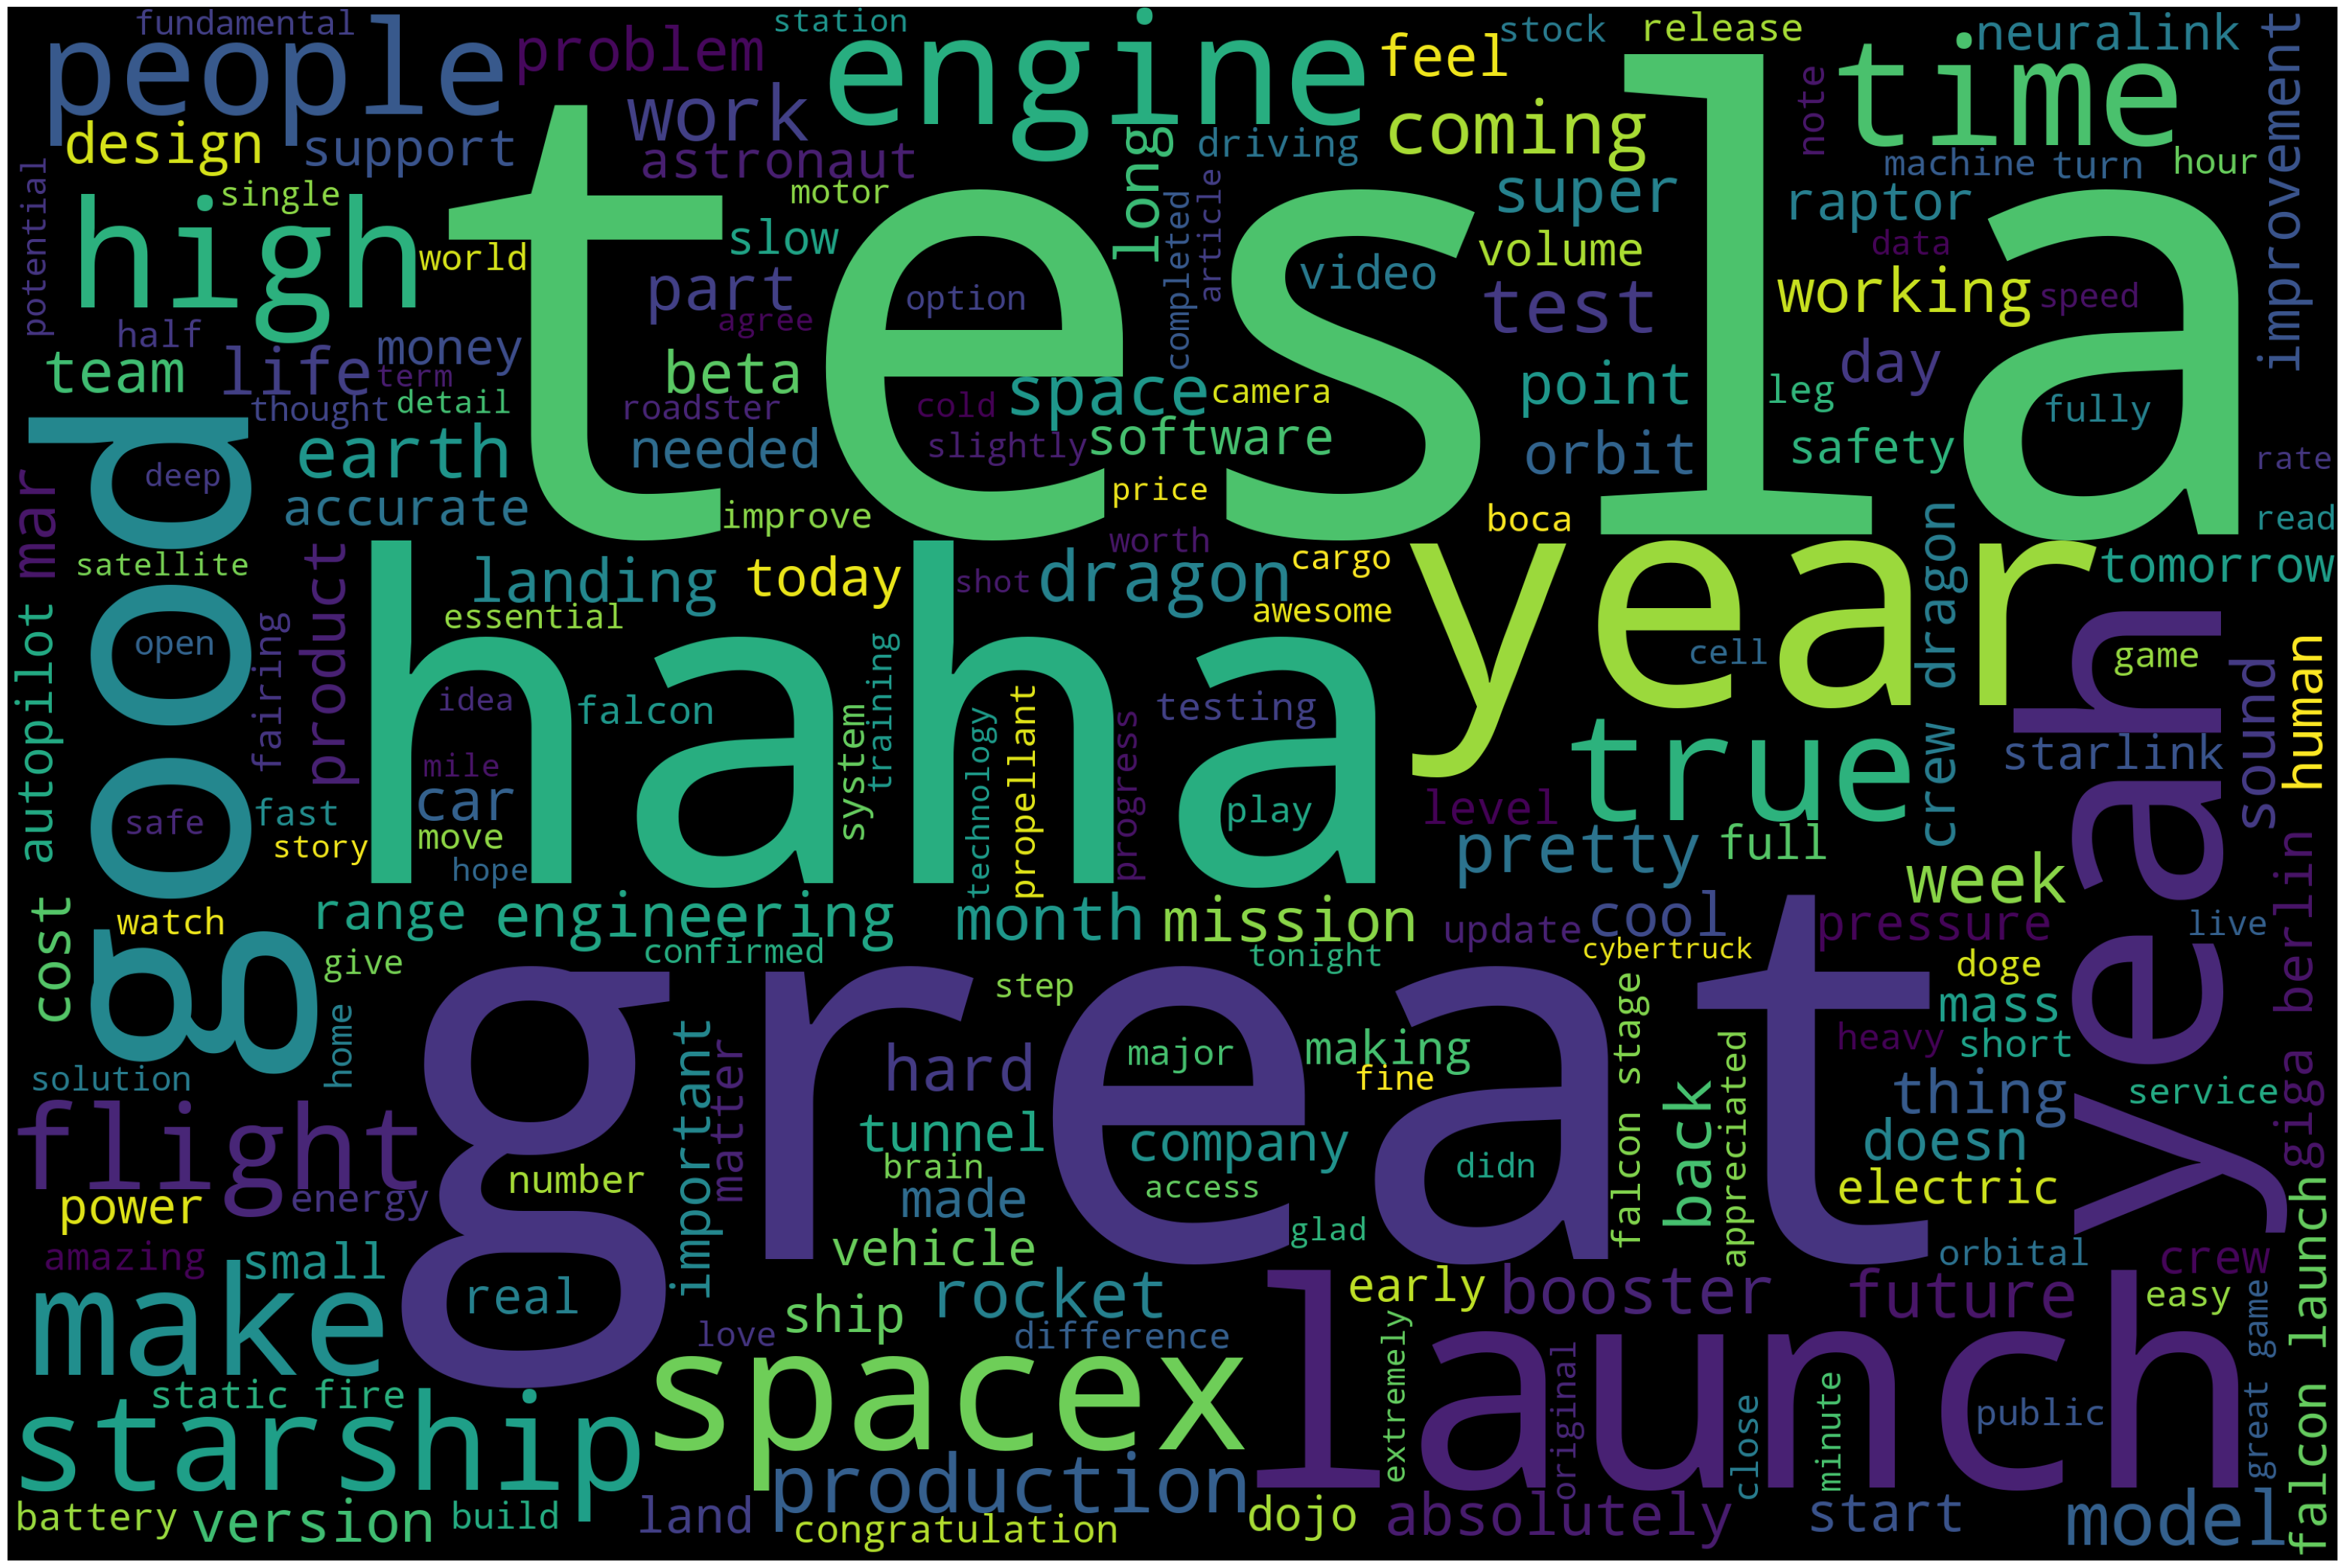

In [56]:
#Frequency of all words present in tweets.

wordcloud = WordCloud(width=3000, height=2000, background_color='black', stopwords=STOPWORDS).generate(tweets)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis('off');

In [57]:
#Positive words in tweet.

positive = ' '.join(data['Clean_text'].apply(lambda x: ' '.join(w for w in x.split() if w in positive_words)))
positive

'  great  congratulation amazing happy    entertaining                 prize  work   improve work   cute      genius  easy work    great       great   destiny  clear       good     masterpiece       entertaining   tough    progress super   worked advanced skill helping good   great   correct great instrumental fast important   warm beautiful        great   good love  great  great great  respect     fine  incredible improvement  upgradable                love  approval     catchy          reliable affordable love      excited fresh good  prize pretty       exceptionally smart good  sustainable important valuable glad congratulation good   awesome good  happy glad    good  amazing  wise improvement ease  nice  easy positive   good progress   fair   promised   appreciated        faster   important distinction     great super free  sustainable     optimistic good  super support  futuristic        super appreciated      work  work   classic fast   entertaining great    worth proud  work wor

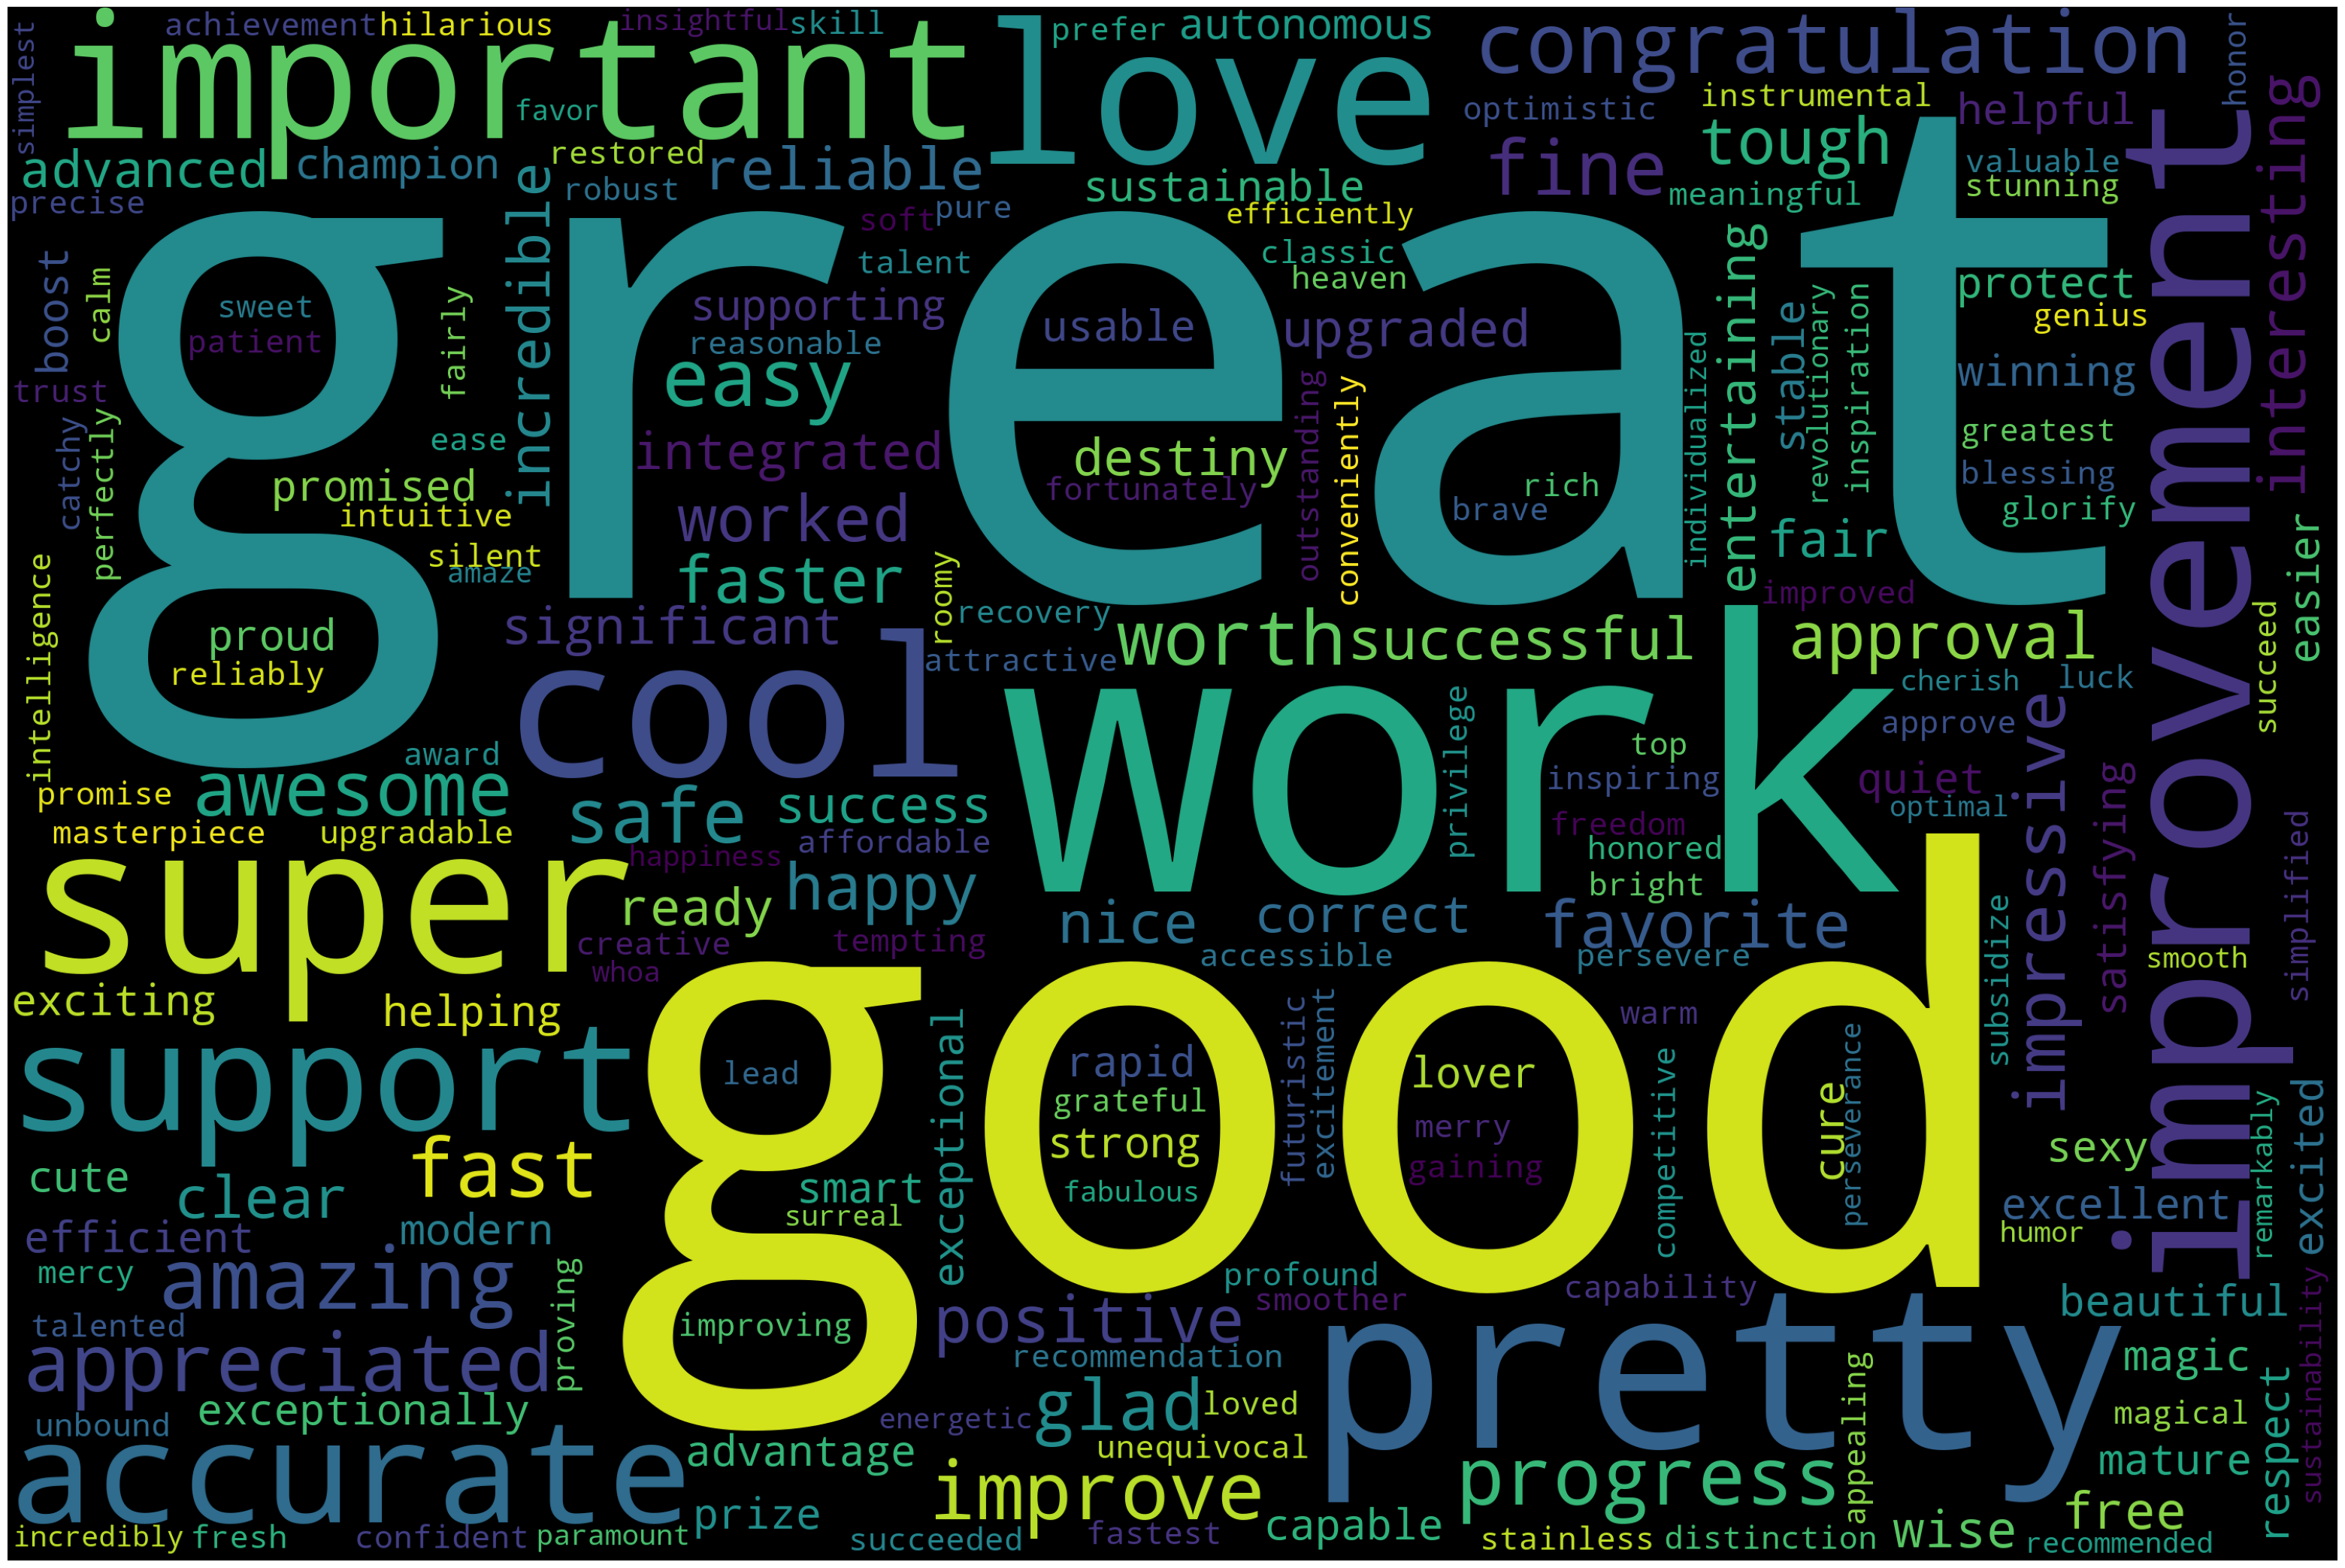

In [58]:
#Frequency of all positive words present in tweets.

wordcloud = WordCloud(width=3000, height=2000, background_color='black', stopwords=STOPWORDS).generate(positive)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis('off');

In [59]:
#Negative words in tweet.

negative = ' '.join(data['Clean_text'].apply(lambda x: ' '.join(w for w in x.split() if w in negative_words)))
negative

'      fail       issue     suck   difficult negative   mar     inflationary      misleading pain       intense  mar         hang stranger  scratch   burn        throttle risk foolish destroyer   dumb              hard    weird injury       unusually           inevitable           apologist     broken       annoying obstacle hedge  trap    discord wild discord         crazy  tyranny hell     confusion   fallout        unfavorable    problem        stuck toxic                fallout     twist knife      hard excruciating   mar static       steal mar  burn suicide   hate          junkyard unhappy                sick    critical   hard   mar   strange       dumb   falling pain      ignore       hard  tank     opposition opposition     wack     trouble   weird   hazard sneaky critical                         sick nightmare            fall bug  wrong   strange  hard twisted    crazy                  tank    grumpy absurdly  incorrect  absence nightmare  slow crazy       impossible   slow   

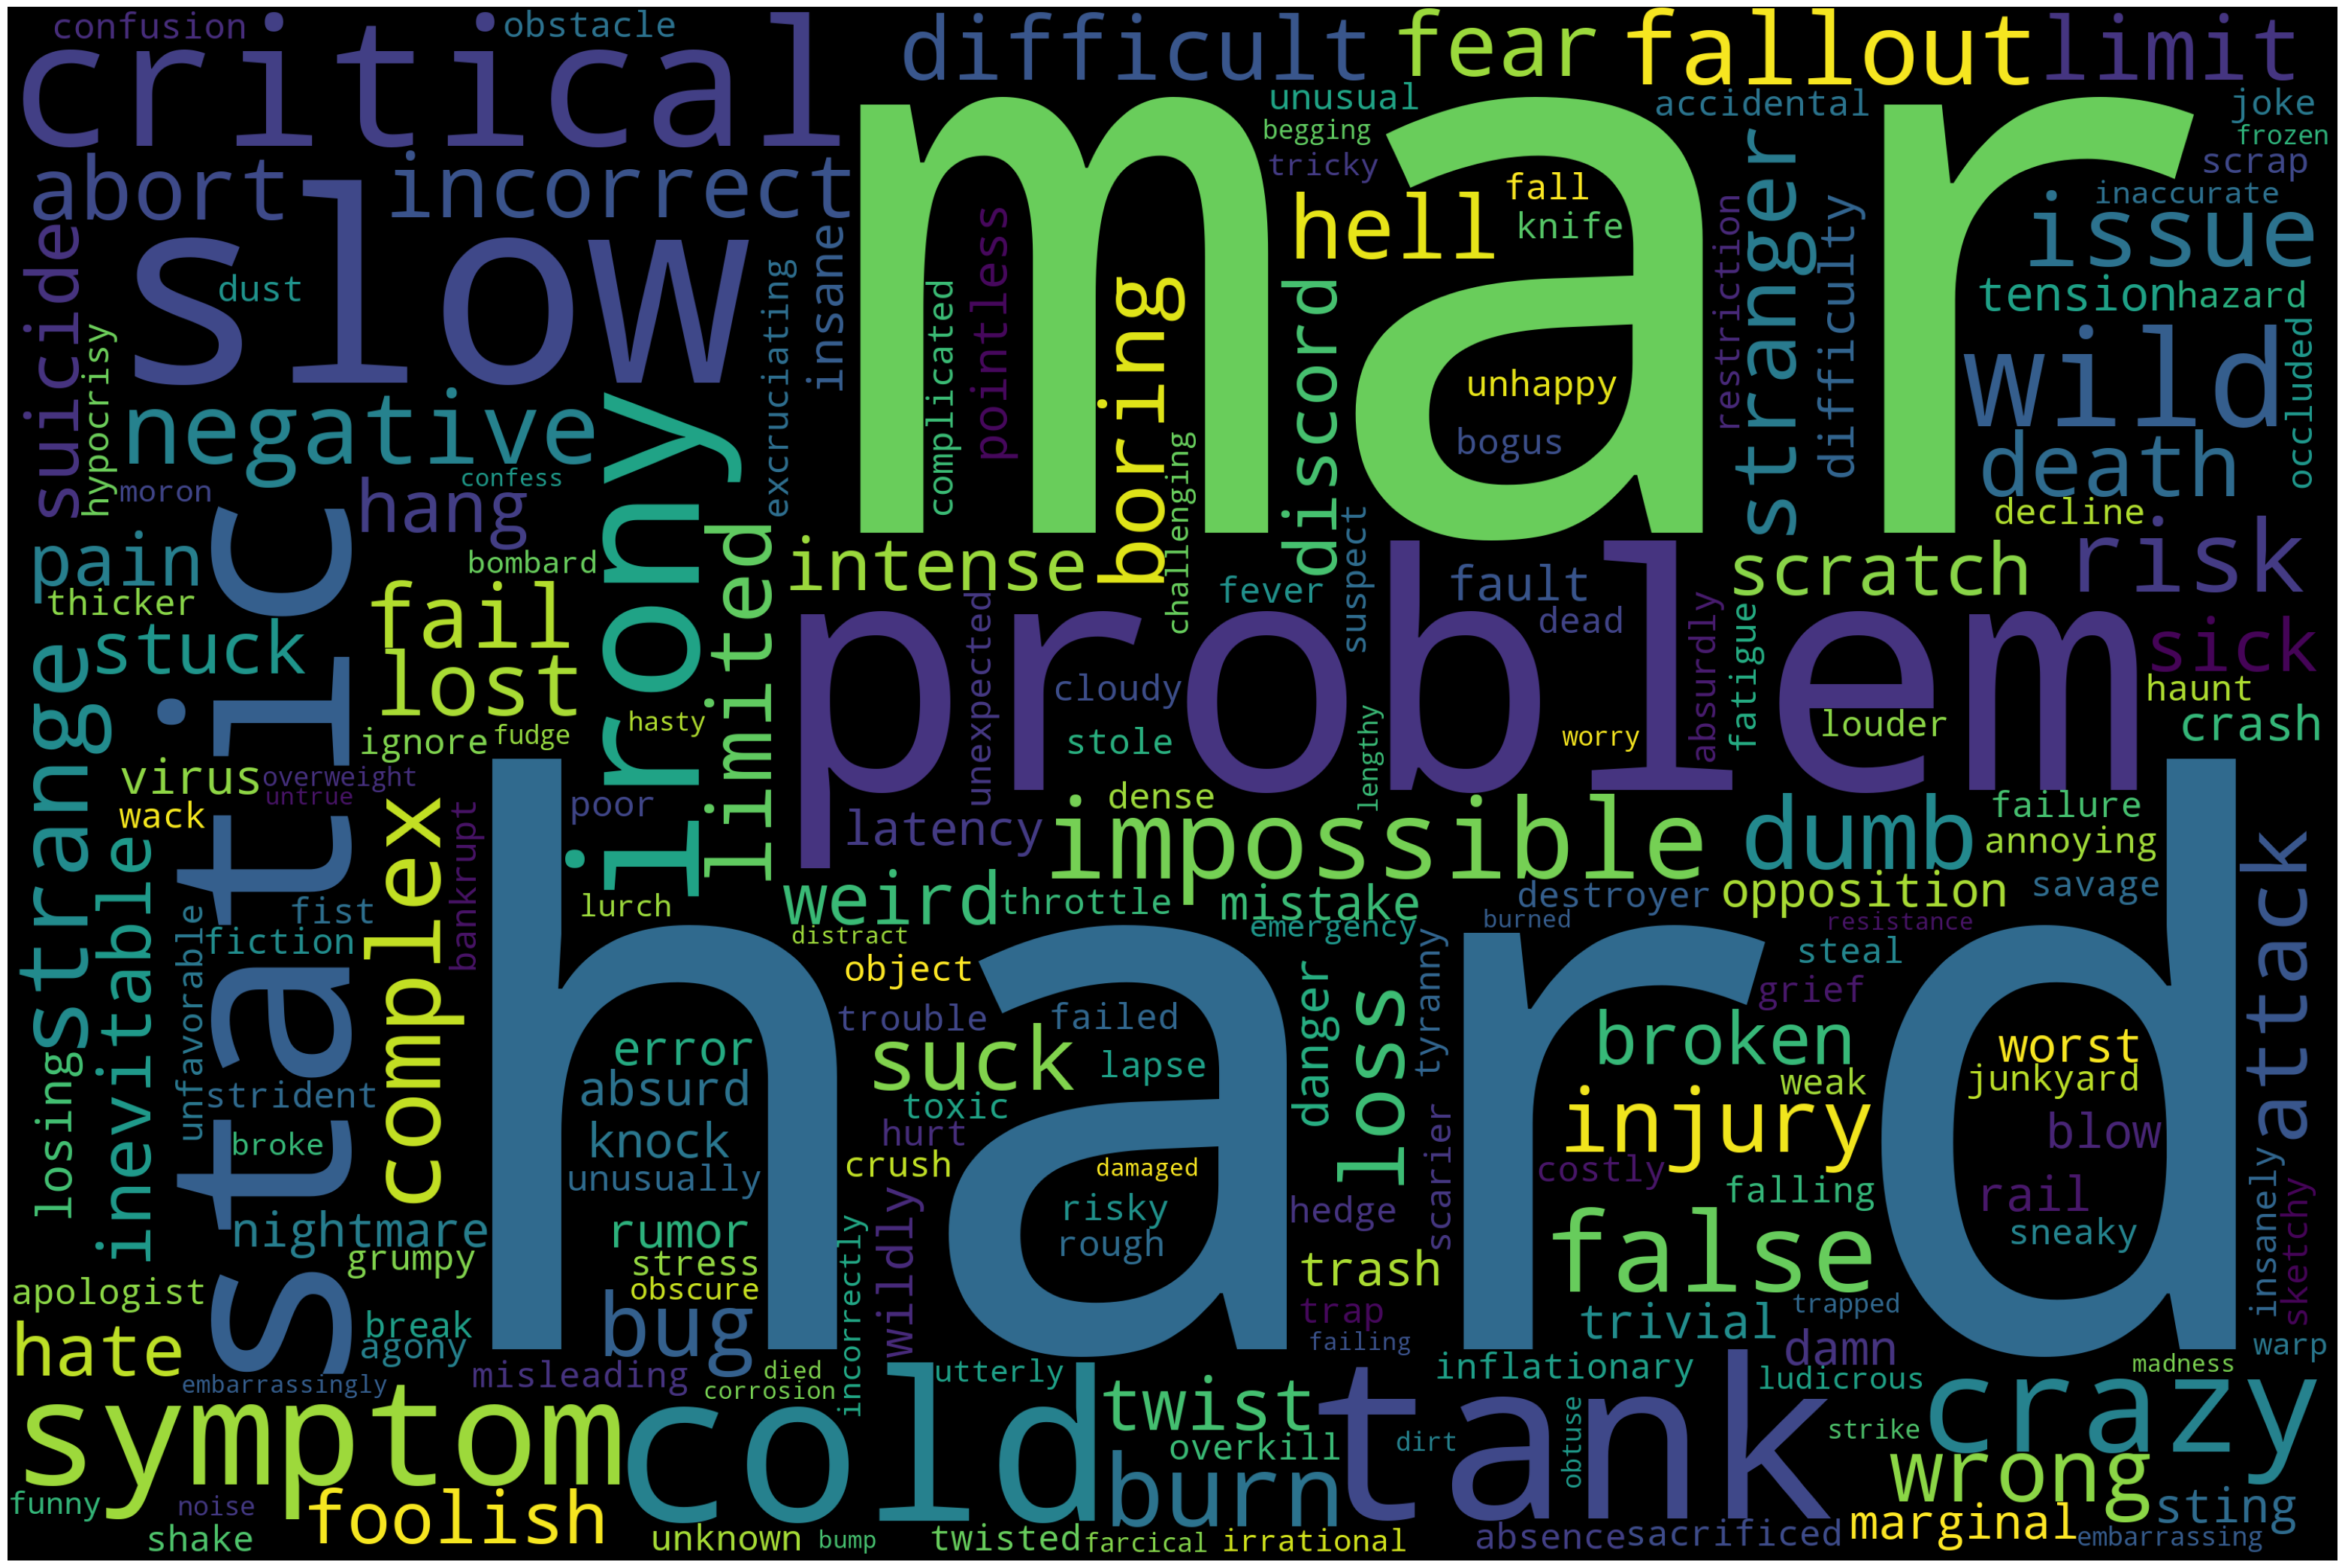

In [60]:
#Frequency of all negative words present in tweets.

wordcloud = WordCloud(width=3000, height=2000, background_color='black', stopwords=STOPWORDS).generate(negative)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis('off');

## =======================================================================